C:\Users\yh1024\Box\LAB\Lab Folder\EXPERIMENTS\CONFOCAL EXPERIMENTS\FRET\021025_FRET_optimize


Import Libraries

In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.filters import gaussian, threshold_otsu, threshold_multiotsu
from skimage.measure import label, regionprops
from skimage.morphology import remove_small_objects, binary_dilation, disk
import czifile
import skimage.io as io
from skimage import exposure
from cellpose import models
from skimage.filters import unsharp_mask
from skimage.segmentation import find_boundaries
from matplotlib.colors import TwoSlopeNorm
model = models.Cellpose(model_type='cyto3')
# model = models.Cellpose(model_type='nuclei')

In [8]:
MIN_INCLUSION_SIZE = 10
MAX_INCLUSION_SIZE = 10000
COLOR_SCHEME = 'viridis'

Define Sub Functions

In [9]:
def show_image(image,cmap=COLOR_SCHEME):

    plt.imshow(image, cmap=cmap)
    plt.colorbar()
    plt.show()
    
def show_ratio_image(image,cmap=COLOR_SCHEME):

    # if norm:
    #     plt.imshow(image, cmap=cmap, norm=TwoSlopeNorm(vmin=np.min(image), vcenter=1, vmax=np.max(image)))
    # else:
    #     plt.imshow(image, cmap=cmap)
    plt.imshow(image, cmap=cmap,vmin=0, vmax=5)
    plt.colorbar()
    plt.show()

In [10]:



def analyze_image(image_path, basename,verbose=False):
    """
    Analyze an image by its individual cells
    Args:
        image_path: Path to the .czi image file.
        basename: Base name for the file, used in the output DataFrame.

    Returns:
        A DataFrame containing details about each image 
        A second DataFrame containing details about each detected cell
    """
    
    # Load the image and squeeze dimensions
    image = czifile.imread(image_path)
    image_squeezed = np.squeeze(image)

    # Separate the channels
    orange_channel = image_squeezed[0, :, :]
    green_channel = image_squeezed[1, :, :]


    orange_channel = gaussian(orange_channel, sigma=2)
    green_channel = gaussian(green_channel, sigma=2)

    # set the threshold to the 50th percentile brightness
    orange_background_threshold = np.percentile(orange_channel, 50)
    green_background_threshold = np.percentile(green_channel, 50)

    # show_image(orange_channel>orange_background_threshold)
    # show_image(green_channel>green_background_threshold)

    orange_channel = orange_channel * (orange_channel > orange_background_threshold)
    green_channel = green_channel * (green_channel > green_background_threshold)
    
    


    mask = orange_channel > (threshold_otsu(orange_channel)*0.9)

    # dilate orange_channel_mask and green_channel_mask
    mask = binary_dilation(mask, disk(8))

    mask = 1 - mask
    orange_channel_applied_mask = orange_channel * mask
    green_channel_applied_mask = green_channel * mask




    # print("Red Channel")
    # show_image(red_channel_thresholded)

    if verbose:
        print("Orange Channel")
        show_image(orange_channel)
        print("Green Channel")
        show_image(green_channel)
        # print("Orange Channel Thresholded")
        # show_image(orange_channel_mask)
        # print("Green Channel Thresholded")
        # show_image(green_channel_mask)
        print("Orange Channel Applied Mask")
        show_image(orange_channel_applied_mask)
        print("Green Channel Applied Mask")
        show_image(green_channel_applied_mask)

    ratio_image_original = orange_channel / green_channel
    ratio_image_applied_mask = orange_channel_applied_mask / green_channel_applied_mask

    # make all the nan 0
    ratio_image_original = np.nan_to_num(ratio_image_original, nan=0, posinf=0, neginf=0)
    ratio_image_applied_mask = np.nan_to_num(ratio_image_applied_mask, nan=0, posinf=0, neginf=0)   
 
    print("Ratio Image")
    show_ratio_image(ratio_image_original)
    print("Ratio Image Applied Mask")
    show_ratio_image(ratio_image_applied_mask)

    


In [11]:
def analyze_all_images(image_folder, images=None,verbose=False):
    print("Analyzing images in folder: ", image_folder)
    # images is the list of images to analyze, if set to None, analyze all images

    for well_image in os.listdir(image_folder):
        
        if well_image.lower().endswith(".czi"):  # Filter for CZI files
            if images is not None and well_image not in images:
                continue
           
            # mitochondria distance\010725_mito_OA\3K_no_OA_settings\3K_Lipidtox_01.czi
            well_image_path = os.path.join(image_folder, well_image)

            well_image_base_name = os.path.basename(well_image)[:-4]

            
           

            if verbose:
                print("-" * 200)
                print("Image: ",well_image_path)
                
            analyze_image(well_image_path, well_image_base_name,verbose=verbose)
            
            
            if verbose:
                print("-" * 200)

    


def analyze_main_folder(folder,verbose=False):
    for subfolder in os.listdir(folder):
        if os.path.isdir(os.path.join(folder, subfolder)):
            analyze_all_images(os.path.join(folder, subfolder),verbose=verbose)
    print("Analysis Complete")


Analyzing images in folder:  ./Conventional_images_FRET_500-550
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Image:  ./Conventional_images_FRET_500-550\Bodipy_493-503_conventional_image_01.czi
Orange Channel


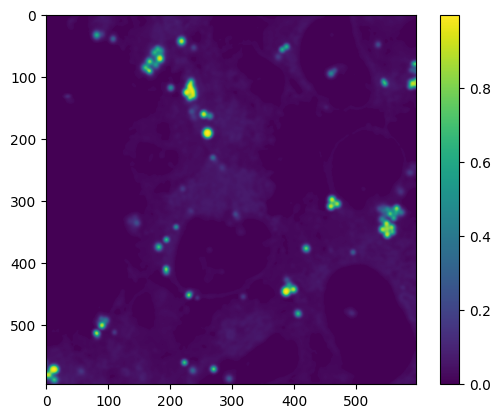

Green Channel


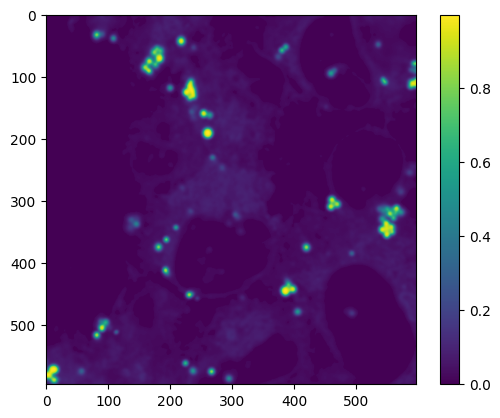

Orange Channel Applied Mask


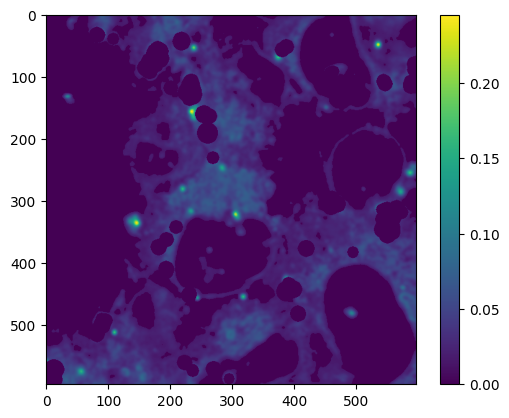

Green Channel Applied Mask


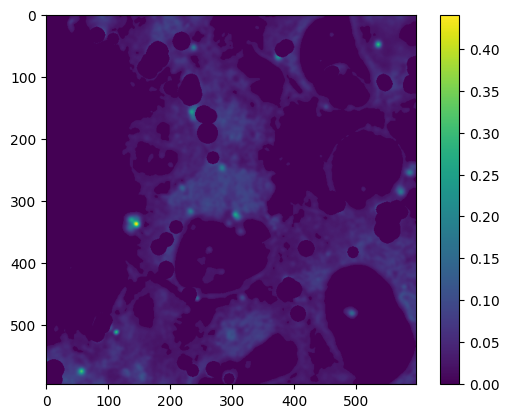

Ratio Image


C:\Users\yh1024\AppData\Local\Temp\ipykernel_576\270902154.py:67: RuntimeWarning: divide by zero encountered in divide
  ratio_image_original = orange_channel / green_channel
C:\Users\yh1024\AppData\Local\Temp\ipykernel_576\270902154.py:67: RuntimeWarning: invalid value encountered in divide
  ratio_image_original = orange_channel / green_channel
C:\Users\yh1024\AppData\Local\Temp\ipykernel_576\270902154.py:68: RuntimeWarning: divide by zero encountered in divide
  ratio_image_applied_mask = orange_channel_applied_mask / green_channel_applied_mask
C:\Users\yh1024\AppData\Local\Temp\ipykernel_576\270902154.py:68: RuntimeWarning: invalid value encountered in divide
  ratio_image_applied_mask = orange_channel_applied_mask / green_channel_applied_mask


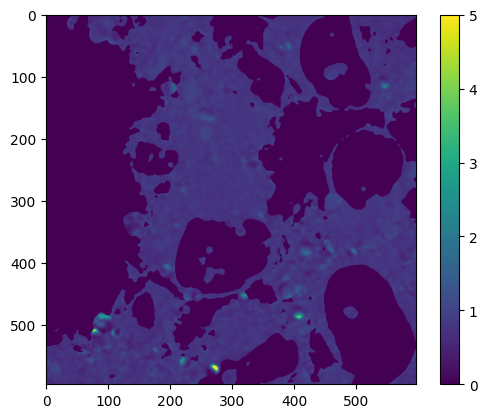

Ratio Image Applied Mask


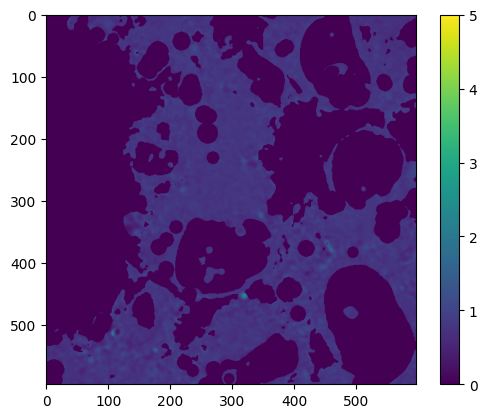

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Image:  ./Conventional_images_FRET_500-550\Bodipy_493-503_conventional_image_02.czi
Orange Channel


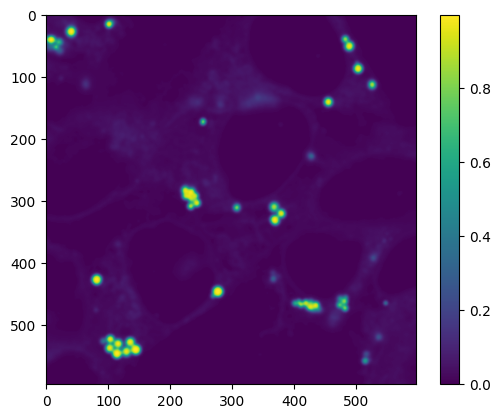

Green Channel


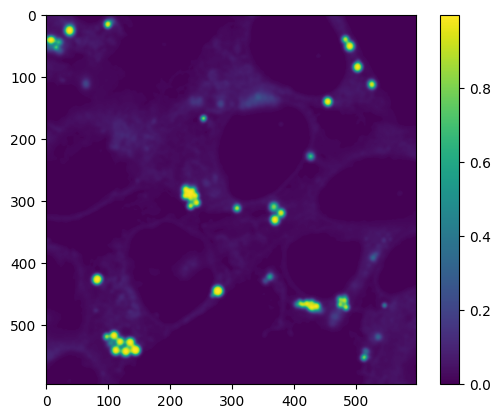

Orange Channel Applied Mask


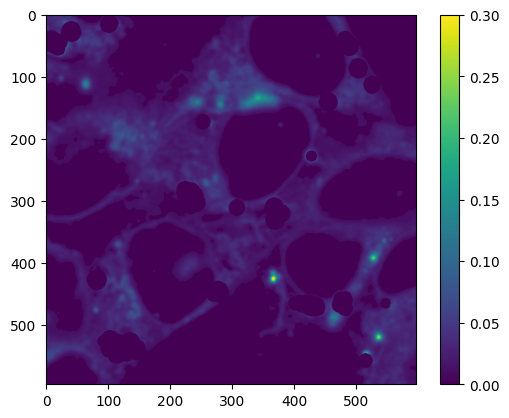

Green Channel Applied Mask


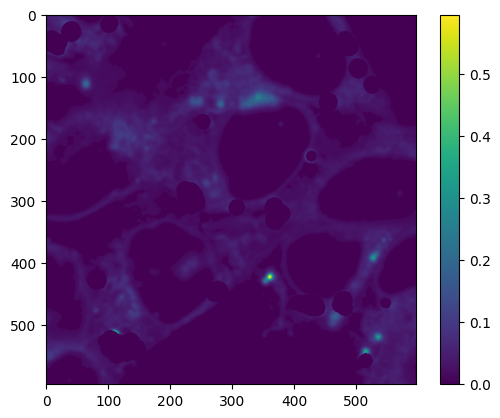

Ratio Image


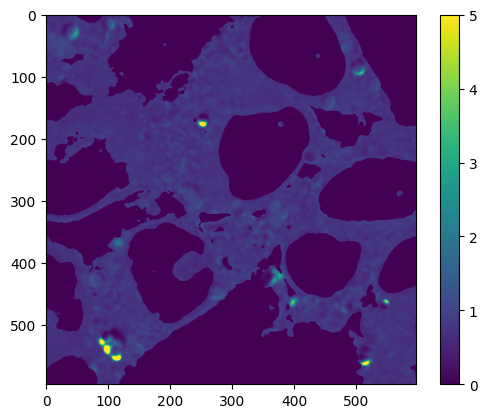

Ratio Image Applied Mask


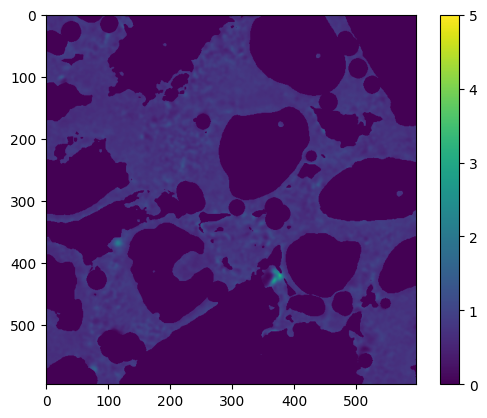

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Image:  ./Conventional_images_FRET_500-550\Bodipy_493-503_conventional_image_03.czi
Orange Channel


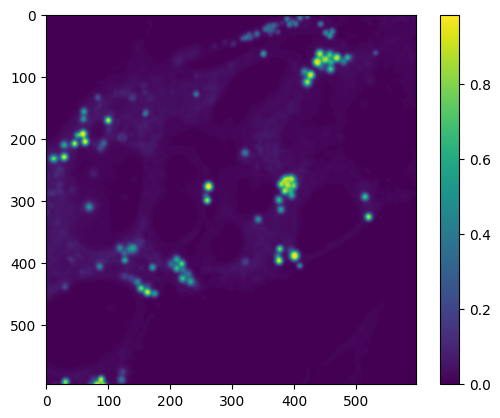

Green Channel


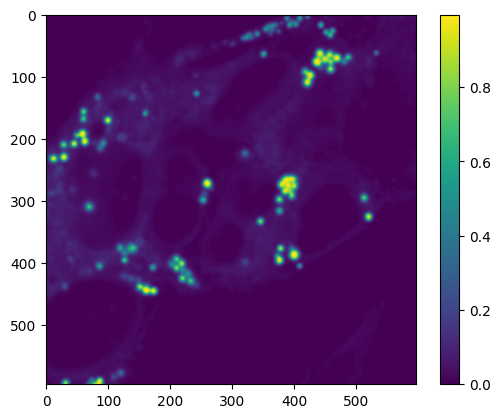

Orange Channel Applied Mask


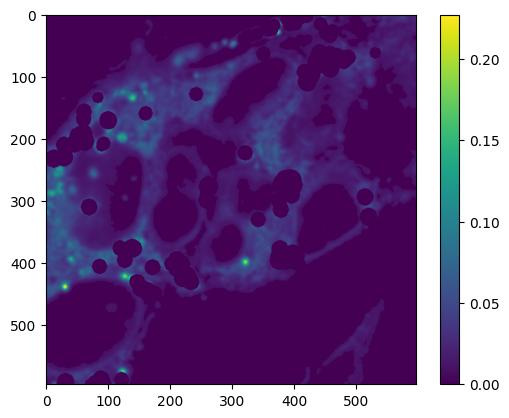

Green Channel Applied Mask


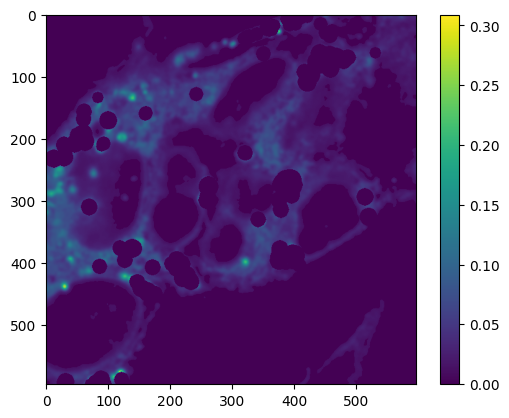

Ratio Image


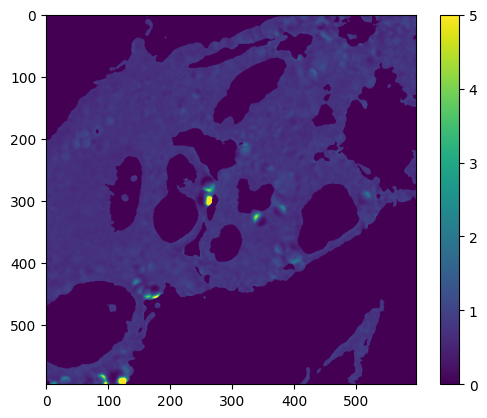

Ratio Image Applied Mask


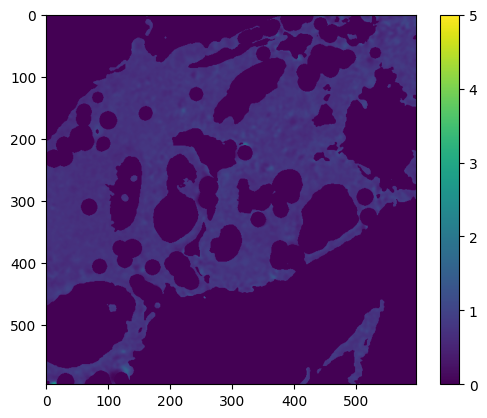

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Image:  ./Conventional_images_FRET_500-550\C12_Bodipy_493-503_conventional_image_01.czi
Orange Channel


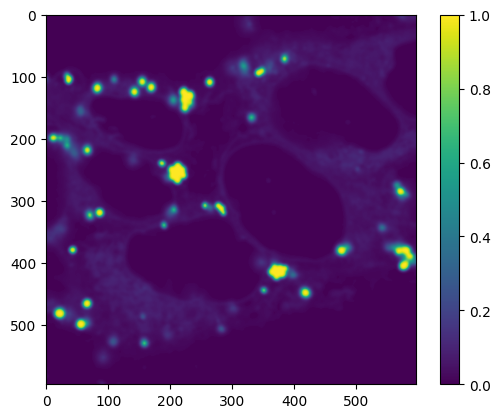

Green Channel


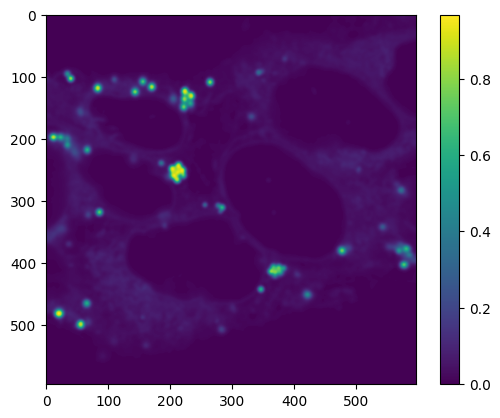

Orange Channel Applied Mask


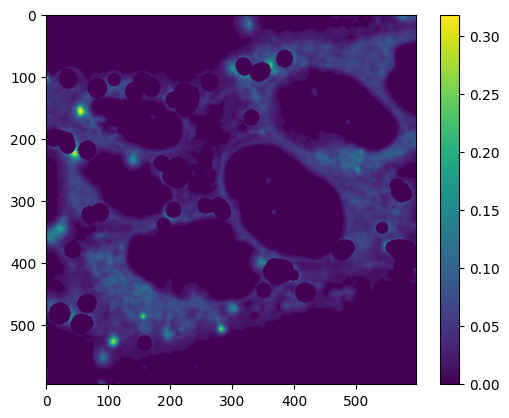

Green Channel Applied Mask


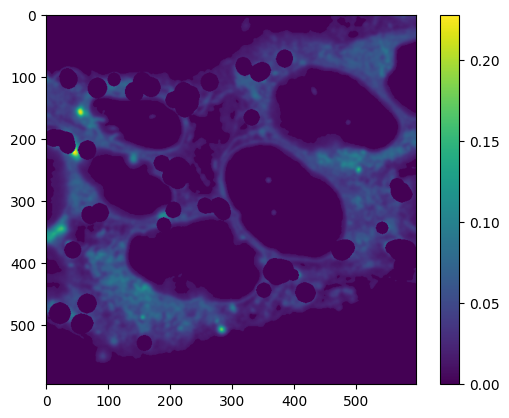

Ratio Image


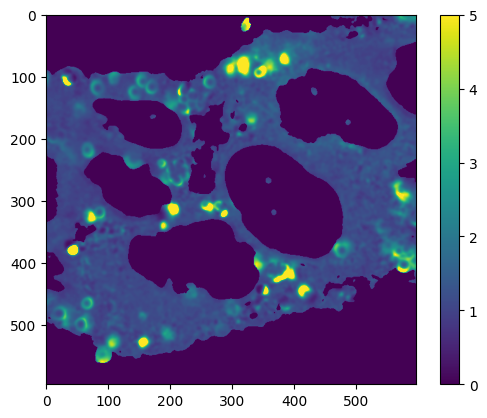

Ratio Image Applied Mask


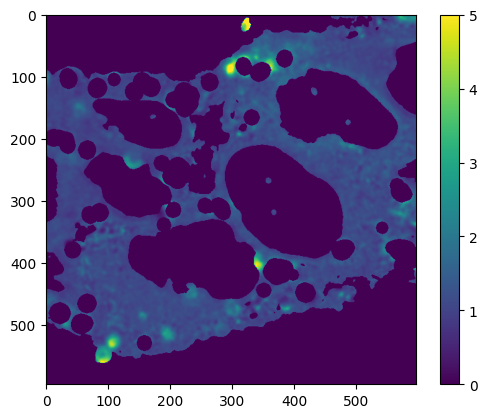

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Image:  ./Conventional_images_FRET_500-550\C12_Bodipy_493-503_conventional_image_02.czi
Orange Channel


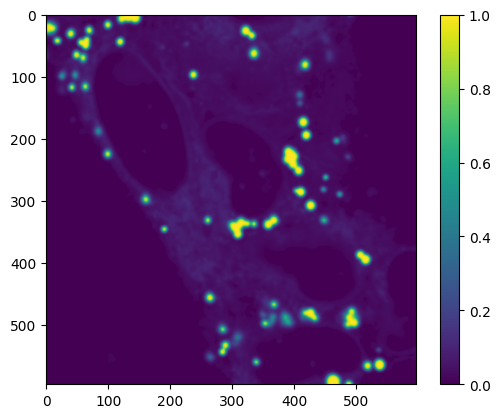

Green Channel


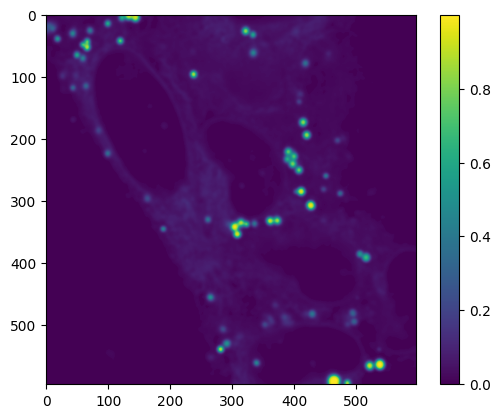

Orange Channel Applied Mask


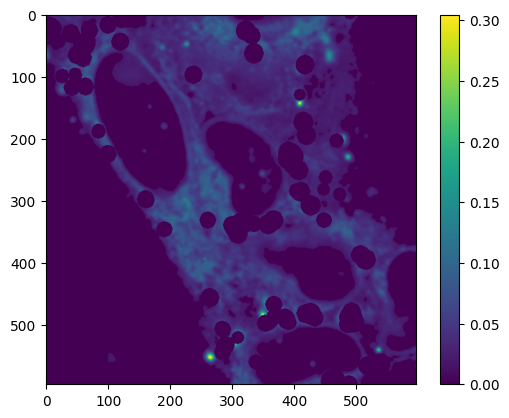

Green Channel Applied Mask


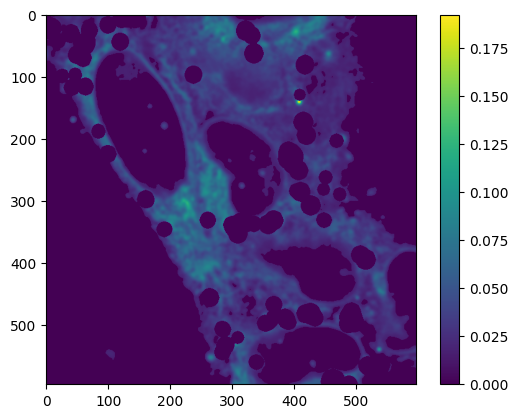

Ratio Image


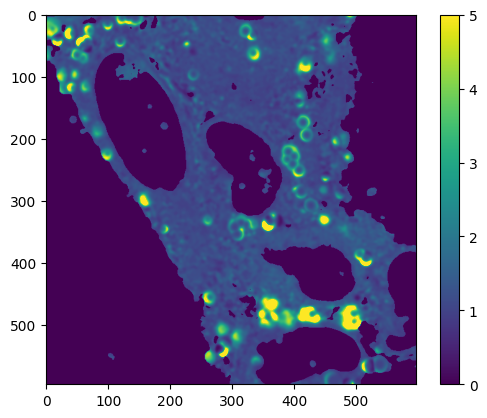

Ratio Image Applied Mask


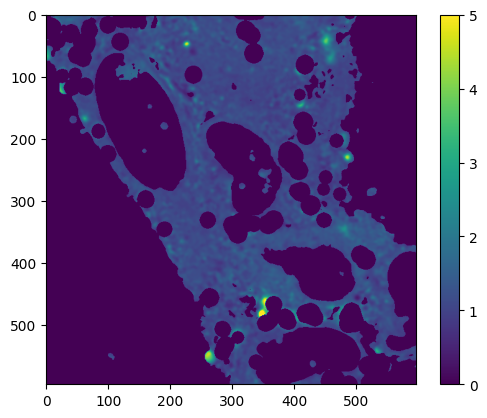

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Image:  ./Conventional_images_FRET_500-550\C12_Bodipy_493-503_conventional_image_03.czi
Orange Channel


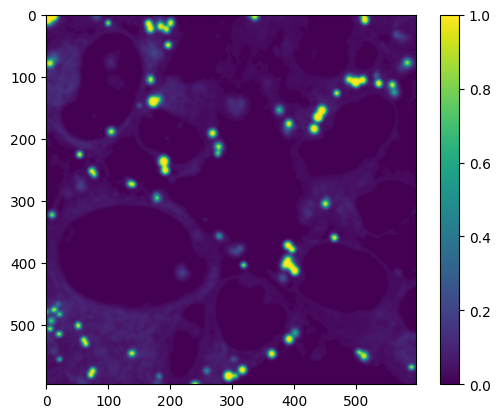

Green Channel


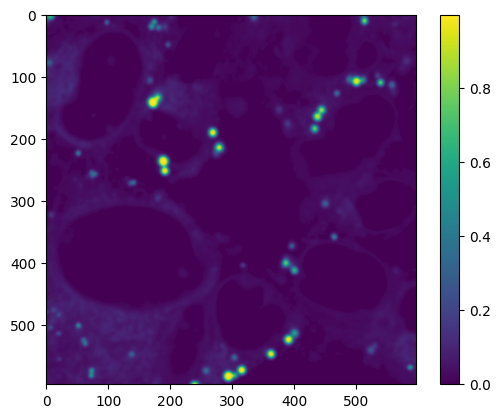

Orange Channel Applied Mask


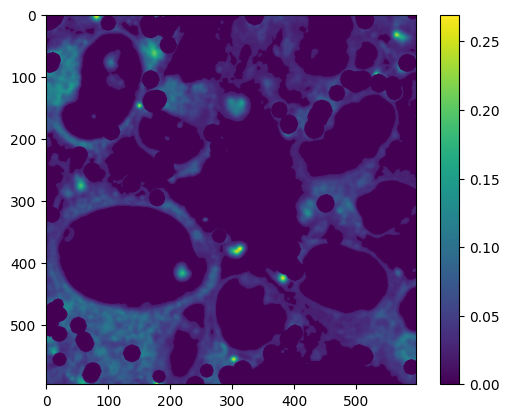

Green Channel Applied Mask


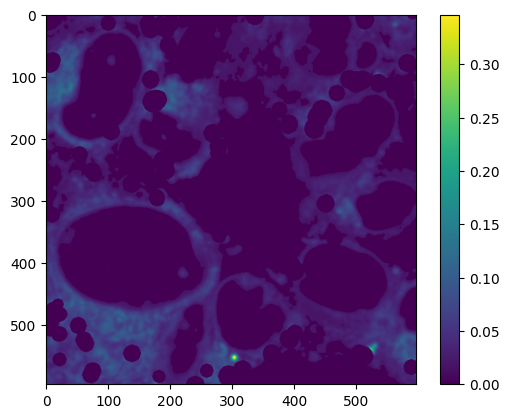

Ratio Image


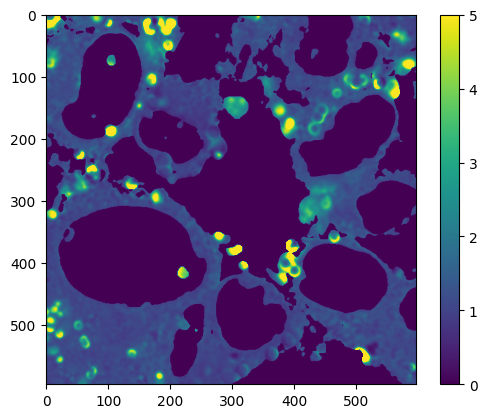

Ratio Image Applied Mask


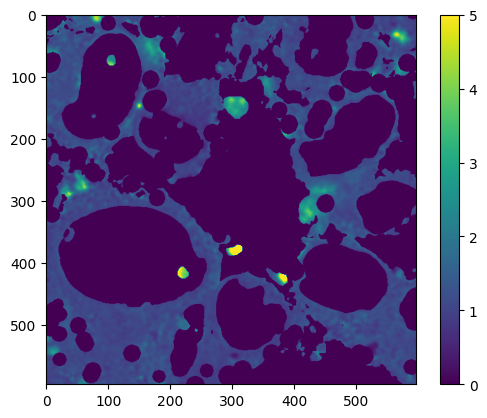

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Analysis Complete


In [12]:
analyze_main_folder('./',True)
